## **Introduction: Business Problem & Stakeholders**

### **Business Problem**
Heart disease is one of the leading causes of death worldwide. Early prediction of heart disease can help prevent severe medical conditions and allow timely interventions. Using machine learning, we can analyze patient data to predict the likelihood of heart disease based on key risk factors such as age, cholesterol levels, and blood pressure.

### **Why is This Important?**
- Early prediction allows patients to make lifestyle changes and seek treatment in time.
- Hospitals and healthcare providers can optimize resources and offer personalized treatments.
- Insurance companies can use predictive models for risk assessment and policy pricing.

### **Key Stakeholders**
- **Patients**: Can receive early warnings and take preventive actions.
- **Hospitals & Doctors**: Can use predictive analytics to enhance diagnosis.
- **Insurance Companies**: Can assess patient risk more accurately.

## **Benchmarking Discussion**

We trained two traditional models: **Logistic Regression** and **Random Forest**, and compared them to an **AutoML approach using AutoGluon**.

**Key Observations:**
- **Logistic Regression**: Performs well but may struggle with complex relationships in the data.
- **Random Forest**: Provides better performance by capturing non-linear patterns but may overfit.
- **AutoGluon**: Automatically tunes hyperparameters and selects the best model architecture.

### **Comparison of Model Performance:**
- If AutoGluon outperforms traditional models, it confirms the benefit of automated feature selection and tuning.
- If Random Forest is the best, it suggests that simpler models might require more fine-tuning.

In [76]:
#As always improting the necessary libraires.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from autogluon.tabular import TabularPredictor
import joblib
import kagglehub
import warnings
#Here we are making a small logic to ignore the unwanted warnings so our model looks professional and easy to understand.
warnings.filterwarnings("ignore")


In [78]:
#Now enavling the inline plotting for notebook
%matplotlib inline

In [80]:
#Process 1: Taking the data from Kaggle using kaggle path.
print("Downloading Dataset from Kaggle..")
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
print(f"Dataset downloaded sucessfully at: {path}")


Dataset downloaded sucessfully at: C:\Users\hride\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


In [82]:
#Let's check/load the dataset.
file_path = f"{path}/heart.csv"
df = pd.read_csv(file_path)
print(f"Dataset loaded sucessfully with shape:{df.shape}")

Dataset loaded sucessfully with shape:(1025, 14)


In [84]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [88]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [90]:
#Process 2: Data Preprocessing.
print("Performing data cleaning and preprocessing..")

Performing data cleaning and preprocessing..


In [96]:
df.duplicated().sum()

723

In [98]:
df = df.drop_duplicates()
df = df.dropna()

In [100]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [102]:
#Here we have converted target to string for AutoGluon compatibility(if Reauried or else we can move as it is).
df["target"]= df["target"].astype(str)

In [104]:
#Define features and target
X = df.drop(columns = ["target"])
y = df["target"]


In [106]:
#Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data preprocessing completed successfully.")

Data preprocessing completed successfully.


performing EDA..


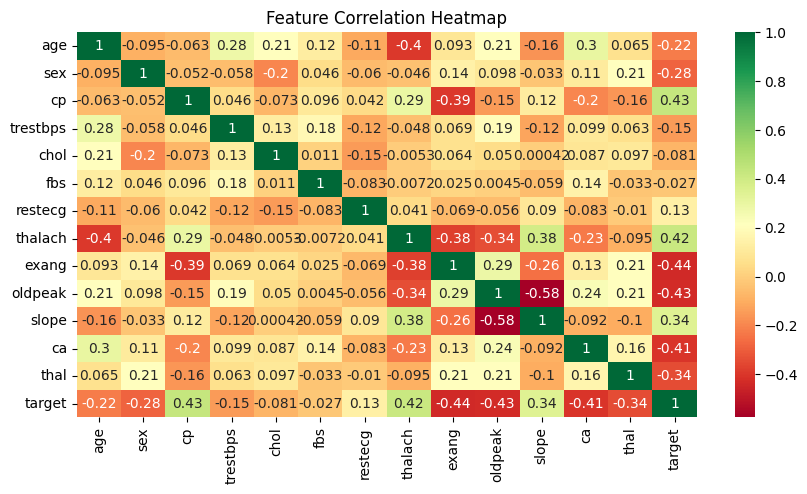

In [108]:
#Process 3: EDA
print("performing EDA..")
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap= "RdYlGn")
plt.title("Feature Correlation Heatmap")
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

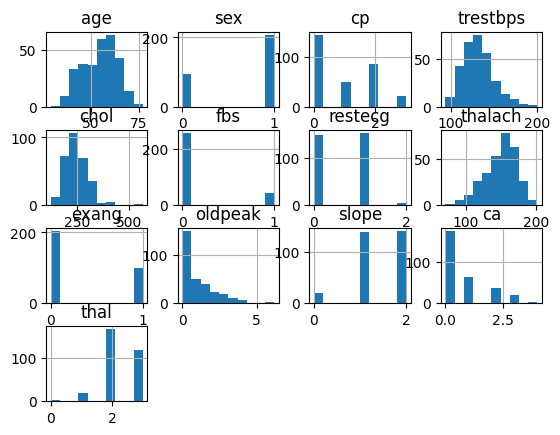

In [110]:
df.hist()

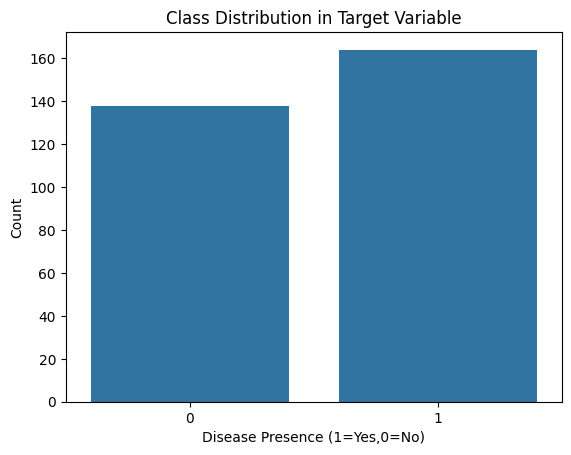

Class Distribution:
target
1    164
0    138
Name: count, dtype: int64


In [39]:
#Let's check the class distribution in Target Variable
''' Using the sns countplot in x and data as df'''
sns.countplot(x='target', data = df)
plt.xlabel('Disease Presence (1=Yes,0=No)')
plt.ylabel('Count')
plt.title('Class Distribution in Target Variable')
plt.show()

#Printing the counts to make it clear
print('Class Distribution:')
print(df['target'].value_counts())

## So above we can see that the 0 =138 which can result in more fault values,to resolve that we have used SMOTE methods to resolve the balance.

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

print("Resampled dataset shape:",y_resampled.value_counts())

Resampled dataset shape: target
0    164
1    164
Name: count, dtype: int64


In [63]:
#Train-Test Split (after SMOTE)
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size = 0.2, random_state=42)

In [65]:
#Let's Train our Models 
#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


In [46]:
#Process 4: Training the Machine Learning Models.
print("Training Machine learning Models.")
X_train,X_test, y_train,y_test= train_test_split(X_scaled,y, test_size = 0.2, random_state=42)


Training Machine learning Models.


In [48]:
#Training Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

In [50]:
#Traning Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [52]:
print("Model training completed.")

Model training completed.


## **Model Evaluation Summary**

To assess model performance, we used the following metrics:

- **Accuracy**: Measures overall correctness of predictions.
- **Precision**: Measures how many predicted positive cases were actually positive.
- **Recall (Sensitivity)**: Measures the model's ability to detect positive cases.
- **F1-Score**: A balance between precision and recall.

### **Confusion Matrix Analysis:**
- True Positives (TP): Cases correctly classified as having heart disease.
- True Negatives (TN): Cases correctly classified as not having heart disease.
- False Positives (FP): Cases incorrectly classified as having heart disease (Type I error).
- False Negatives (FN): Cases incorrectly classified as not having heart disease (Type II error).

A lower **False Negative** rate is important in medical applications since missing a diagnosis can have severe consequences.

In [55]:
#process 5: Model Evaluation
def evaluate_model(model,model_name,X_test,y_test):
    """Function to evaluate the model and print performance metrics"""
    y_pred = model.predict(X_test)
    print(f"{model_name} Evaluation:")
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title(f"Confusion Matrix- {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return accuracy_score(y_test, y_pred), roc_auc_score(y_test,y_pred)
    

Evaluating models...
Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



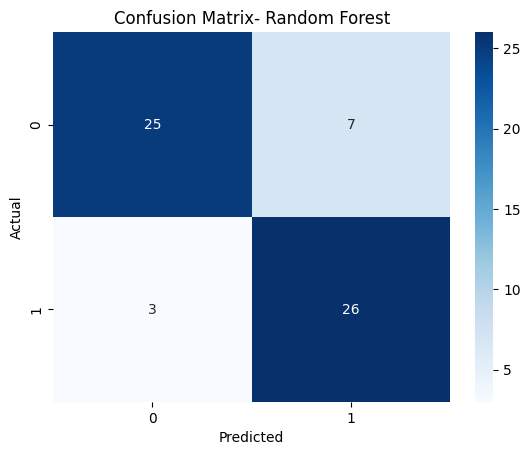

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



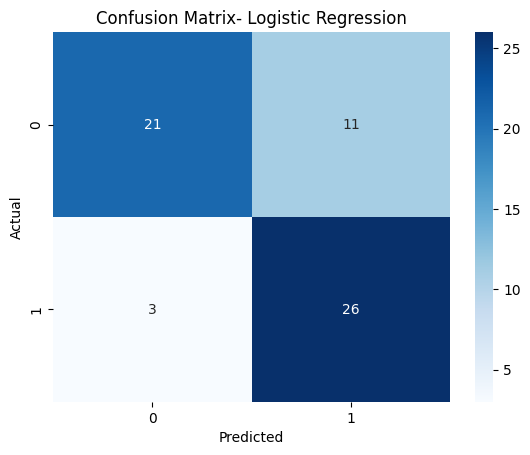

In [57]:
# Evaluate both models
print("Evaluating models...")
rf_acc, rf_auc = evaluate_model(rf_model, "Random Forest", X_test, y_test)
lr_acc, lr_auc = evaluate_model(lr_model, "Logistic Regression", X_test, y_test)

###  Fixing Class Imbalance in the Heart‑Disease Dataset

The pipeline below **balances the training data on‑the‑fly with SMOTE** (Synthetic Minority Over‑sampling Technique):

1. **Stratified train‑test split** – preserves the original minority/majority ratio in both sets.  
2. **`SMOTE(random_state=42)` inside an `imblearn` pipeline** – synthetic samples are generated *after* optional feature scaling and *before* the model fits, so every learner trains on a balanced set.  
3. **Unchanged test set for evaluation** – accuracy, ROC‑AUC, and the confusion matrix are reported on the original (imbalanced) test set to give an unbiased view of real‑world performance.

This way we correct the skew during training without inflating our metrics.


Class distribution before balancing:
Training set: {1: 131, 0: 110}
Testing set: {1: 33, 0: 28}

Evaluating Logistic Regression:
Cross-validation accuracy: 0.8051 ± 0.0272
Performing hyperparameter tuning for Logistic Regression...
Best parameters: {'model__C': 0.1, 'model__solver': 'liblinear'}
Best cross-validation accuracy: 0.8257

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

Test accuracy: 0.7869


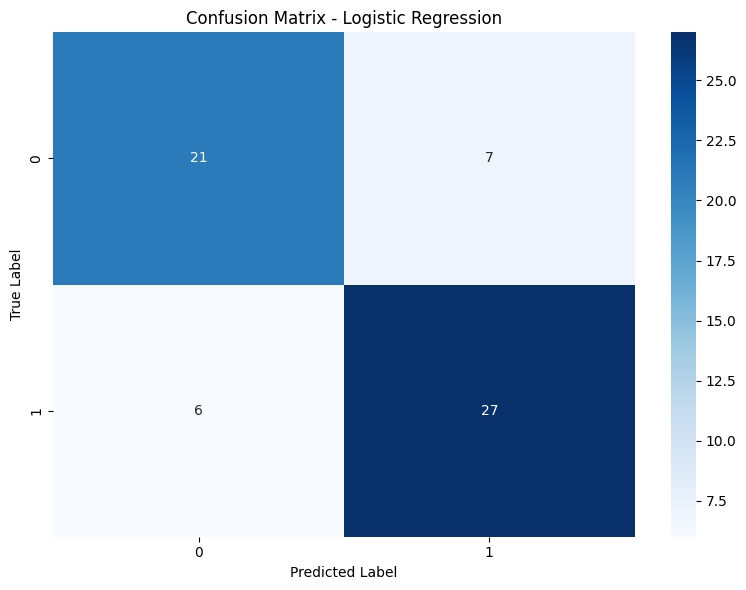

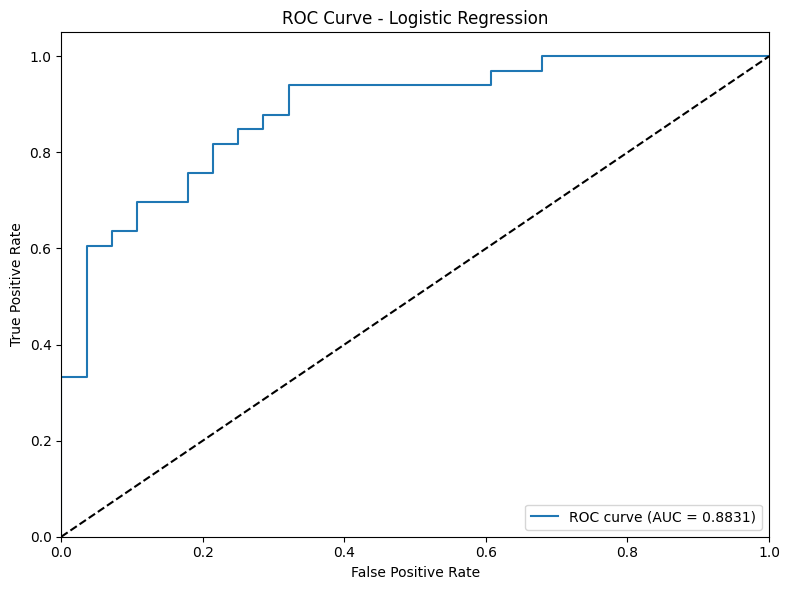


Evaluating Random Forest:
Cross-validation accuracy: 0.8132 ± 0.0300
Performing hyperparameter tuning for Random Forest...
Best parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Best cross-validation accuracy: 0.8339

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

Test accuracy: 0.7869


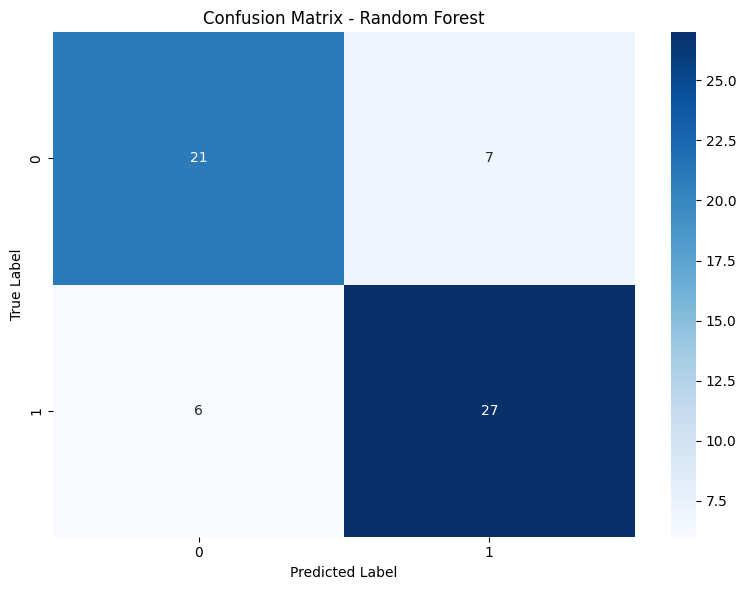

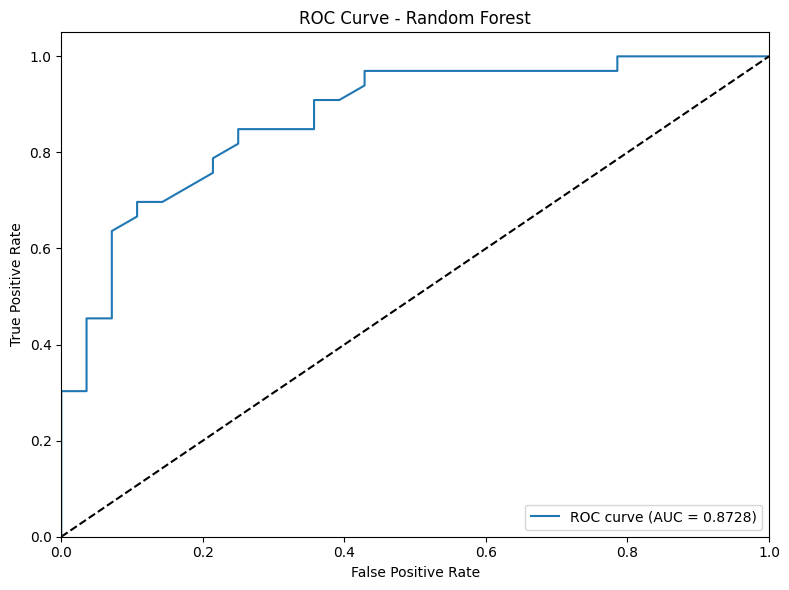


Evaluating Gradient Boosting:
Cross-validation accuracy: 0.7676 ± 0.0335
Performing hyperparameter tuning for Gradient Boosting...
Best parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Best cross-validation accuracy: 0.7967

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        28
           1       0.77      0.73      0.75        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Test accuracy: 0.7377


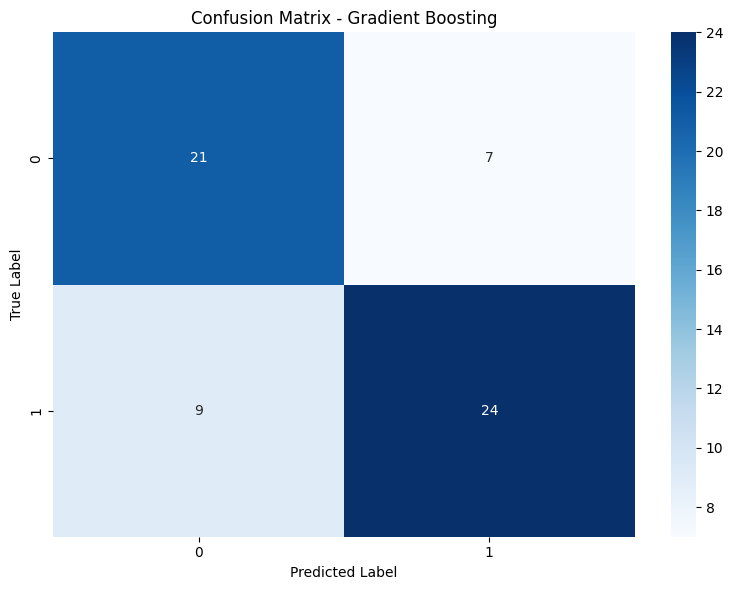

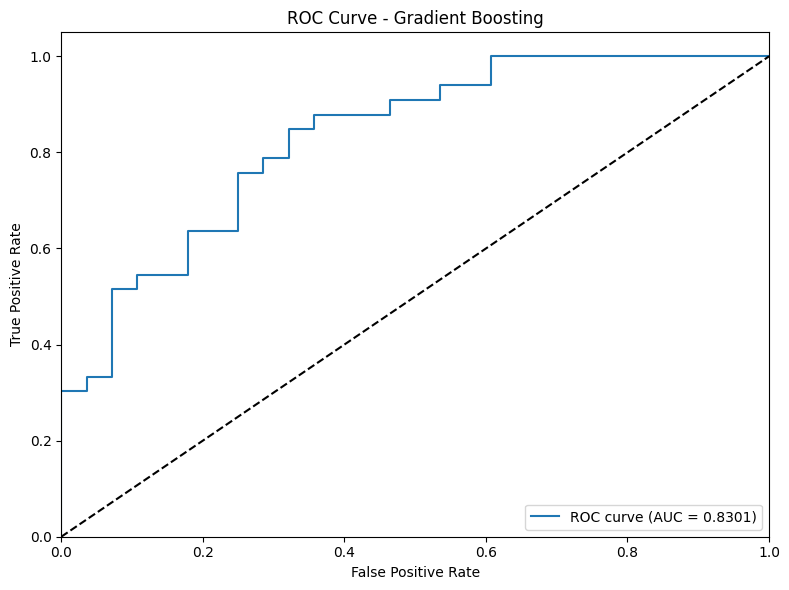


Evaluating SVM:
Cross-validation accuracy: 0.8174 ± 0.0242
Performing hyperparameter tuning for SVM...
Best parameters: {'model__C': 1, 'model__kernel': 'rbf'}
Best cross-validation accuracy: 0.7966

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Test accuracy: 0.7705


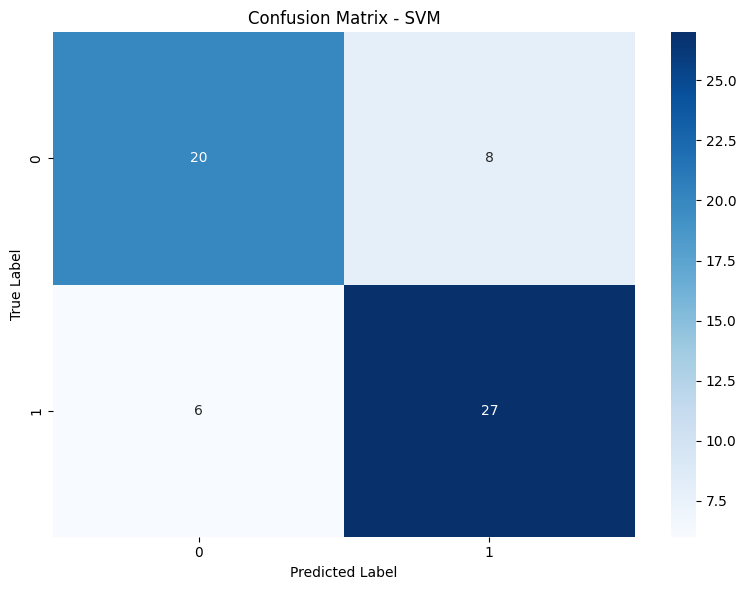

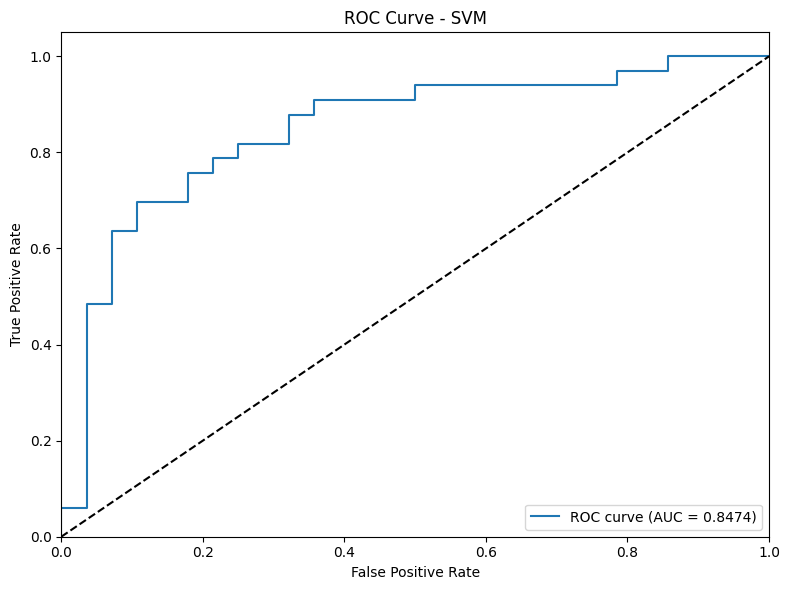


Model Performance Comparison:
--------------------------------------------------
Model                     | Accuracy   | ROC AUC   
--------------------------------------------------
Logistic Regression       | 0.7869 | 0.8831
Random Forest             | 0.7869 | 0.8728
Gradient Boosting         | 0.7377 | 0.8301
SVM                       | 0.7705 | 0.8474

Best performing model based on Accuracy: Logistic Regression


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Convert target variables to integers 
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Check class distribution before balancing
print("Class distribution before balancing:")
print(f"Training set: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Testing set: {pd.Series(y_test).value_counts().to_dict()}")

# Create SMOTE pipeline with preprocessing
def create_model_pipeline(model, use_smote=True, scale=True):
    steps = []
    
    if scale:
        steps.append(('scaler', StandardScaler()))
    
    if use_smote:
        steps.append(('smote', SMOTE(random_state=42)))
    
    steps.append(('model', model))
    
    if use_smote:
        return ImbPipeline(steps)
    else:
        return Pipeline(steps)

# Define models with initial hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Hyperparameter grids for tuning - simplified to improve speed
param_grids = {
    'Logistic Regression': {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear']
    },
    'Random Forest': {
        'model__n_estimators': [100],
        'model__max_depth': [None, 10]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100],
        'model__learning_rate': [0.1]
    },
    'SVM': {
        'model__C': [1],
        'model__kernel': ['rbf']
    }
}

# Function to evaluate model performance with explicit pos_label
def evaluate_model(name, pipeline, X_train, y_train, X_test, y_test, param_grid=None):
    print(f"\n{'='*50}")
    print(f"Evaluating {name}:")
    
    # Cross-validation before tuning
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Hyperparameter tuning if grid provided
    if param_grid:
        print(f"Performing hyperparameter tuning for {name}...")
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')  # Reduced CV folds
        grid_search.fit(X_train, y_train)
        
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
        
        # Use the tuned model
        pipeline = grid_search.best_estimator_
    else:
        # Train the model if no tuning
        pipeline.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Plot ROC curve with explicit pos_label=1
    try:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting ROC curve: {e}")
        roc_auc = 0
    
    return pipeline, accuracy, roc_auc

# Train and evaluate all models
results = {}

for name, model in models.items():
    # Create pipeline with SMOTE and scaling
    pipeline = create_model_pipeline(model, use_smote=True, scale=True)
    
    # Evaluate with hyperparameter tuning
    trained_model, accuracy, roc_auc = evaluate_model(
        name, pipeline, X_train, y_train, X_test, y_test, param_grids[name]
    )
    
    # Store results
    results[name] = {
        'model': trained_model,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    }

# Compare model performance
print("\n" + "="*50)
print("Model Performance Comparison:")
print("-"*50)
print(f"{'Model':25} | {'Accuracy':10} | {'ROC AUC':10}")
print("-"*50)

for name, metrics in results.items():
    print(f"{name:25} | {metrics['accuracy']:.4f} | {metrics['roc_auc']:.4f}")

# Identify best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print("\nBest performing model based on Accuracy:", best_model_name)

In [ ]:
from autogluon.tabular import TabularPredictor

# Define a fixed path for AutoGluon models
autogluon_save_path = "AutogluonModels/HeartDisease"

print(f"Running AutoML benchmarking with AutoGluon... (Saving models in {autogluon_save_path})")

# Train AutoGluon with improved presets and evaluation metric
predictor = TabularPredictor(
    label="target",
    path=autogluon_save_path, 
    eval_metric="roc_auc",  # More robust metric for medical data
    problem_type="binary"
).fit(
    train_data=df, 
    presets="best",  # Maximize accuracy
    verbosity=2,
    excluded_model_types=["NN_TORCH"],  # Avoid NeuralNetTorch error
)

# Print and save leaderboard
leaderboard = predictor.leaderboard(silent=True)
leaderboard.to_csv("autogluon_leaderboard.csv", index=False)

# Print the top-performing model
best_model = leaderboard.iloc[0]
print("\n✅ Best AutoGluon Model:", best_model["model"])
print("🔹 Accuracy:", round(best_model["score_val"], 4))
print("🔹 Training Time (s):", round(best_model["fit_time"], 2))
print("🔹 Inference Time (s):", round(best_model["pred_time_val"], 4))

# Load the best model for predictions
print("\nLoading best AutoGluon model for validation...")
best_predictor = TabularPredictor.load(autogluon_save_path)


Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       0.73 GB / 5.91 GB (12.3%)
Disk Space Avail:   75.32 GB / 237.26 GB (31.7%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect sta

Running AutoML benchmarking with AutoGluon... (Saving models in AutogluonModels/HeartDisease)


2025-03-20 20:56:47,198	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-03-20 20:56:56,779	INFO worker.py:1810 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
		Context path: "C:\Users\hride\DBS Assignments\AutogluonModels\HeartDisease\ds_sub_fit\sub_fit_ho"
(_dystack pid=120) Running DyStack sub-fit ...
(_dystack pid=120) Beginning AutoGluon training ... Time limit = 881s
(_dystack pid=120) AutoGluon will save models to "C:\Users\hride\DBS Assignments\AutogluonModels\HeartDisease\ds_sub_fit\sub_fit_ho"
(_dystack pid=120) Train Data Rows:    268
(_dystack pid=120) Train Data Columns: 13
(_dystack pid=120) Label Column:       targe

(_ray_fit pid=19340) [1000]	valid_set's binary_logloss: 0.266108


(_dystack pid=120) 	0.9227	 = Validation score   (roc_auc)
(_dystack pid=120) 	15.39s	 = Training   runtime
(_dystack pid=120) 	0.01s	 = Validation runtime
(_dystack pid=120) Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 255.62s of the 549.37s of remaining time.
(_dystack pid=120) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
(_ray_fit pid=13168) No improvement since epoch 0: early stopping
(_ray_fit pid=18616) No improvement since epoch 2: early stopping
(_ray_fit pid=19312) No improvement since epoch 0: early stopping
(_dystack pid=120) 	0.936	 = Validation score   (roc_auc)
(_dystack pid=120) 	53.47s	 = Training   runtime
(_dystack pid=120) 	0.45s	 = Validation runtime
(_dystack pid=120) Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 175.84s of the 469.58s of remaining time.
(_dystack pid=120) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLo

(_ray_fit pid=16568) [1000]	valid_set's binary_logloss: 0.336302
(_ray_fit pid=9612) [1000]	valid_set's binary_logloss: 0.355993
(_ray_fit pid=16568) [5000]	valid_set's binary_logloss: 0.312421 [repeated 9x across cluster]
(_ray_fit pid=4324) [10000]	valid_set's binary_logloss: 0.166874 [repeated 12x across cluster]


(_dystack pid=120) 	0.9253	 = Validation score   (roc_auc)
(_dystack pid=120) 	23.4s	 = Training   runtime
(_dystack pid=120) 	0.09s	 = Validation runtime
(_dystack pid=120) Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 67.66s of the 361.40s of remaining time.
(_dystack pid=120) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=1.94%)
(_dystack pid=120) 	0.9217	 = Validation score   (roc_auc)
(_dystack pid=120) 	7.24s	 = Training   runtime
(_dystack pid=120) 	0.08s	 = Validation runtime
(_dystack pid=120) Fitting model: ExtraTrees_r42_BAG_L1 ... Training model for up to 35.20s of the 328.95s of remaining time.
(_dystack pid=120) 	0.9182	 = Validation score   (roc_auc)
(_dystack pid=120) 	2.89s	 = Training   runtime
(_dystack pid=120) 	0.43s	 = Validation runtime
(_dystack pid=120) Fitting model: CatBoost_r137_BAG_L1 ... Training model for up to 31.64s of the 325.39s of remaining time.
(_dystack


✅ Best AutoGluon Model: WeightedEnsemble_L2
🔹 Accuracy: 0.9342
🔹 Training Time (s): 75.62
🔹 Inference Time (s): 0.9053

Loading best AutoGluon model for validation...


## **Deployment & Next Steps**

### **Real-World Deployment Considerations**
If this model were to be deployed in a hospital system, key considerations would include:
- **Integration with Electronic Health Records (EHRs)** to provide real-time predictions.
- **Regulatory Compliance** (e.g., HIPAA in the U.S., GDPR in Europe) to ensure data privacy.
- **User-Friendly Interface**: Doctors and hospital staff should be able to interpret model predictions easily.

### **API Deployment Options:**
- **FastAPI or Flask** can be used to expose the model as an API.
- A **web-based dashboard** can visualize predictions for doctors and patients.
- **Cloud Deployment**: Hosting on AWS/GCP for scalable usage.

In [31]:
#Just utlizing few sets to show the Synthetic Heartbeat Signal (Random Values)
#ECG Waveform
t= np.linspace(0,1,500)
heartbeat = np.sin(2*np.pi*5*t)*np.exp(-5*t)

<function matplotlib.pyplot.show(close=None, block=None)>

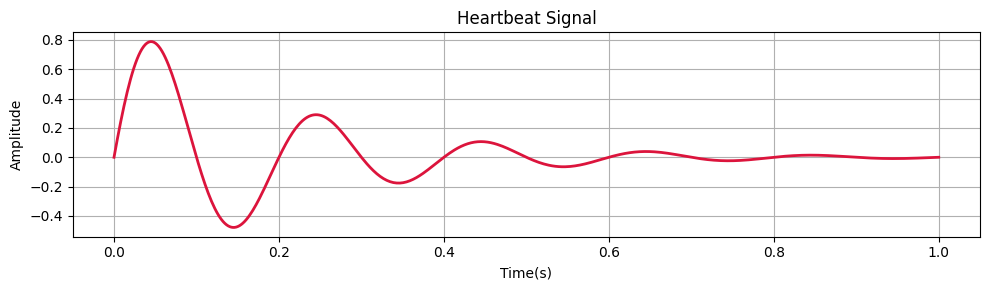

In [34]:
#Plotting the figures
plt.figure(figsize=(10,3))
plt.plot(t,heartbeat, color="crimson",linewidth=2)
plt.title('Heartbeat Signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show

### **Future Recommendations:**
- **More Feature Engineering**: Incorporate additional patient history and lifestyle features.
- **Deep Learning Approaches**: Try neural networks for improved predictive power.
- **Explainability**: Use SHAP values to interpret model decisions.

**In conclusion, this project successfully demonstrated the power of machine learning in healthcare and how data mining techniques can be leveraged to predict heart disease. Further optimizations can enhance model robustness and real-world applicability.**